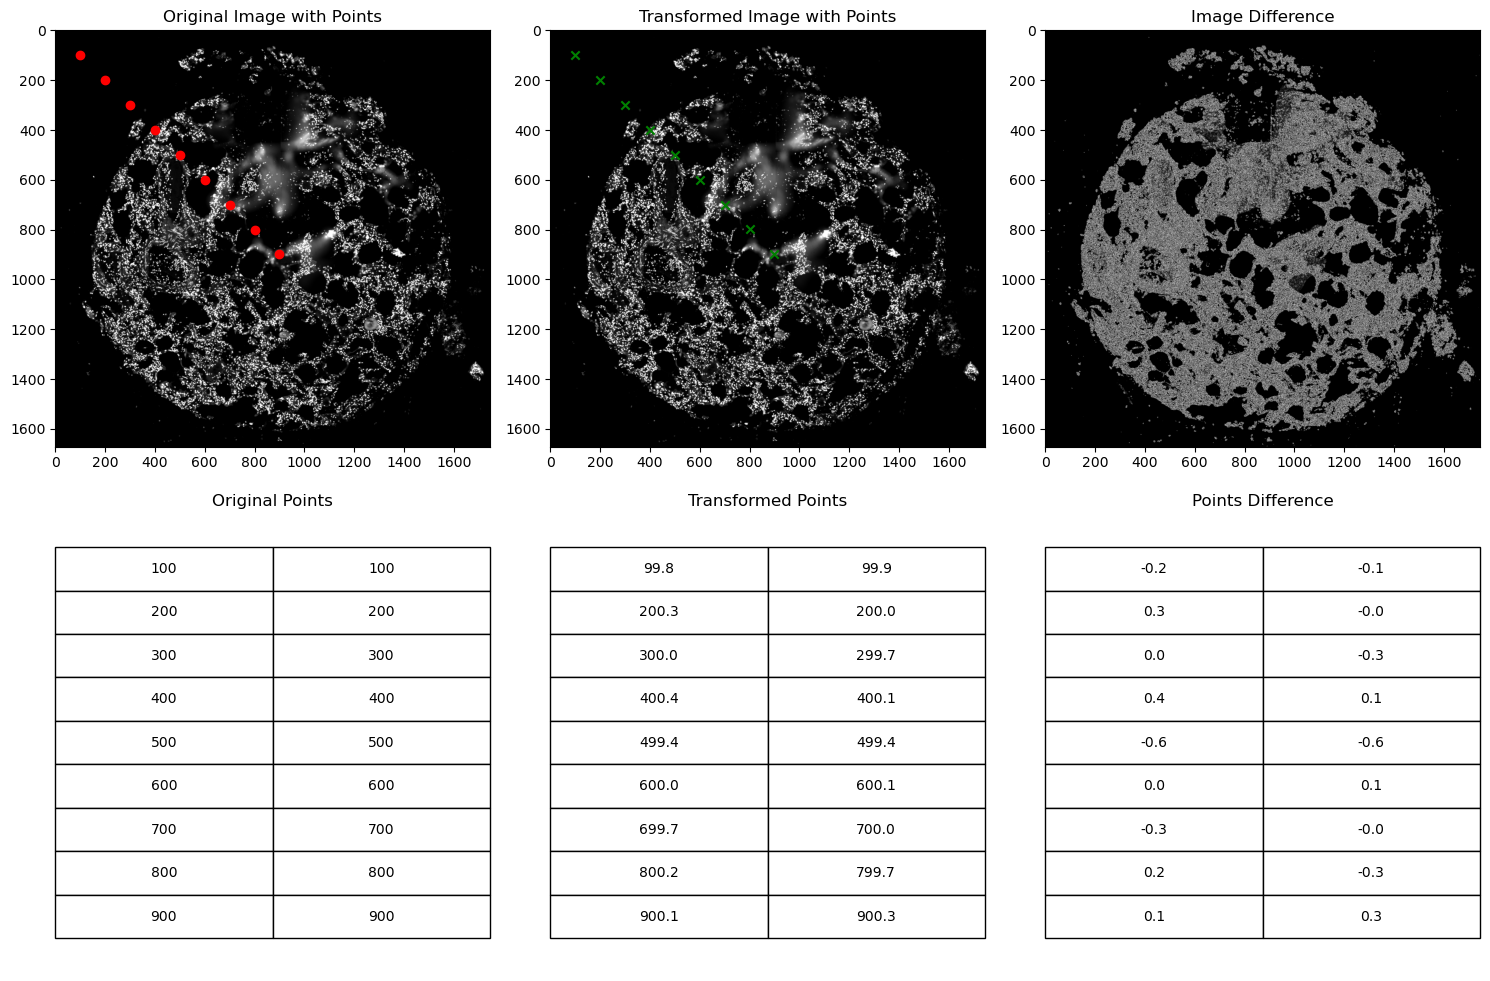

In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

def read_image(path):
    return tiff.imread(path)

def generate_sample_points():
    # Define sample points (adjust according to your image dimensions)
    return np.array([[i,i] for i in range(100,1000,100)])

def apply_elastic_transform(image, points, alpha=5, sigma=3):
    aug = iaa.ElasticTransformation(alpha=alpha, sigma=sigma)
    det_aug = aug.to_deterministic()

    transformed_image = det_aug.augment_image(image)

    keypoints = [Keypoint(x=p[0], y=p[1]) for p in points]
    kps_on_image = KeypointsOnImage(keypoints, shape=image.shape)
    transformed_kps = det_aug.augment_keypoints(kps_on_image)
    transformed_points = np.array([[kp.x, kp.y] for kp in transformed_kps.keypoints])
    
    return transformed_image, transformed_points

def plot_results(orig_image, orig_points, trans_image, trans_points):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    axs[0, 0].imshow(orig_image, cmap='gray')
    axs[0, 0].scatter(orig_points[:, 0], orig_points[:, 1], c='r', marker='o')
    axs[0, 0].set_title("Original Image with Points")

    axs[0, 1].imshow(trans_image, cmap='gray')
    axs[0, 1].scatter(trans_points[:, 0], trans_points[:, 1], c='g', marker='x')
    axs[0, 1].set_title("Transformed Image with Points")

    diff_image = np.abs(orig_image.astype(np.int16) - trans_image.astype(np.int16)).astype(np.uint8)
    axs[0, 2].imshow(diff_image, cmap='gray')
    axs[0, 2].set_title("Image Difference")

    axs[1, 0].axis('off')
    axs[1, 0].table(cellText=np.round(orig_points, 1), loc='center', cellLoc='center').scale(1, 2)
    axs[1, 0].set_title("Original Points")

    axs[1, 1].axis('off')
    axs[1, 1].table(cellText=np.round(trans_points, 1), loc='center', cellLoc='center').scale(1, 2)
    axs[1, 1].set_title("Transformed Points")

    diff_points = trans_points - orig_points
    axs[1, 2].axis('off')
    axs[1, 2].table(cellText=np.round(diff_points, 1), loc='center', cellLoc='center').scale(1, 2)
    axs[1, 2].set_title("Points Difference")

    plt.tight_layout()
    plt.show()

def main():
    image_path = "path/to/tif/file"   
    orig_image = read_image(image_path)
    orig_points = generate_sample_points()
    trans_image, trans_points = apply_elastic_transform(orig_image, orig_points)
    plot_results(orig_image, orig_points, trans_image, trans_points)

if __name__ == "__main__":
    main()
